<a href="https://colab.research.google.com/github/034adarsh/Stock-Price-Prediction-Using-LSTM/blob/main/LSTM_Improved_model(diff_dataset).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import all the required libraries

---



In [22]:
import pandas as pd
import datetime as dt
from datetime import date
import matplotlib.pyplot as plt
import yfinance as yf
import numpy as np
import tensorflow as tf
import requests

# Define start day to fetch the dataset from the yahoo finance library

---



In [21]:


START = "2010-01-01"
TODAY = date.today().strftime("%Y-%m-%d")

# Define a function to load the dataset

def load_data(ticker):
    data = yf.download(ticker, START, TODAY)
    data.reset_index(inplace=True)
    data.to_csv('xau_usd.csv')
    return data

data = load_data('GC=F')

[*********************100%***********************]  1 of 1 completed

1 Failed download:
['GC=F']: JSONDecodeError('Expecting value: line 1 column 1 (char 0)')


In [75]:
data = pd.read_csv('xau_usd.csv')
df=data.copy()
df = df.drop(['Date', 'Change %'], axis = 1,)
df.head()

,Price,Open,High,Low,Vol.
0,"2,960.30","2,951.49","2,961.95","2,951.30",22.17K
1,"2,936.10","2,954.10","2,964.40","2,933.70",159.34K
2,"2,949.00","2,895.10","2,956.50","2,887.60",218.76K
3,"2,900.70","2,957.30","2,964.10","2,889.90",228.08K
4,"2,945.40","2,928.80","2,958.80","2,925.80",169.50K


Visualizing Closing Price

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(df['Price'])
plt.title("GOLD FUTURES Price Yahoo finance")
plt.xlabel("Date")
plt.ylabel("Price (INR)")
plt.grid(True)
plt.show()

In [77]:
file_path = "xau_usd.csv"
df = pd.read_csv(file_path)
df = df.dropna()
# Convert Date to datetime
df["Date"] = pd.to_datetime(df["Date"], format="%m/%d/%Y")

# Convert numerical columns (remove commas)
cols_to_fix = ["Price", "Open", "High", "Low"]
for col in cols_to_fix:
    df[col] = df[col].str.replace(",", "").astype(float)

df = df[::-1].reset_index(drop=True)
# Sort by Date (if needed)
df = df.sort_values("Date", ascending=False)



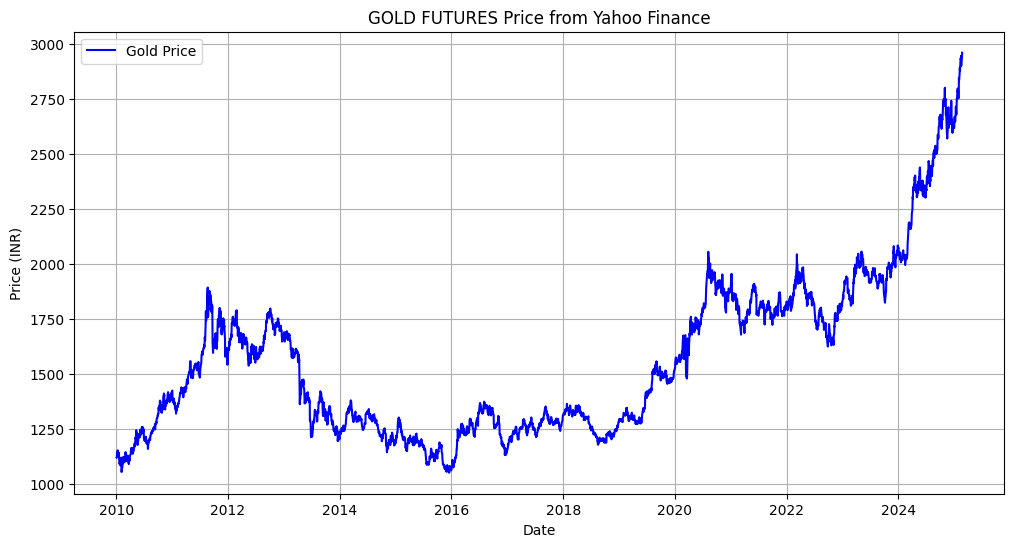

In [78]:

# Plot the cleaned data
plt.figure(figsize=(12, 6))
plt.plot(df["Date"], df["Price"], label="Gold Price", color="blue")

plt.title("GOLD FUTURES Price from Yahoo Finance")
plt.xlabel("Date")
plt.ylabel("Price (INR)")
plt.legend()
plt.grid(True)
plt.show()


In [79]:
df


,Date,Price,Open,High,Low,Vol.,Change %
3854,2025-02-20,2960.3,2951.49,2961.95,2951.3,22.17K,0.82%
3853,2025-02-19,2936.1,2954.10,2964.40,2933.7,159.34K,-0.44%
3852,2025-02-18,2949.0,2895.10,2956.50,2887.6,218.76K,1.67%
3851,2025-02-14,2900.7,2957.30,2964.10,2889.9,228.08K,-1.52%
3850,2025-02-13,2945.4,2928.80,2958.80,2925.8,169.50K,0.57%
...,...,...,...,...,...,...,...
4,2010-01-08,1138.9,1131.50,1140.00,1119.5,212.62K,0.46%
3,2010-01-07,1133.7,1139.00,1139.50,1128.7,121.15K,-0.25%
2,2010-01-06,1136.5,1118.50,1141.00,1116.8,176.90K,1.59%
1,2010-01-05,1118.7,1122.00,1129.60,1115.5,156.41K,0.04%


# Plotting moving averages of 100 day

---



In [80]:
ma100 = df.Price.rolling(100).mean()
ma100

3854         NaN
3853         NaN
3852         NaN
3851         NaN
3850         NaN
          ...   
4       1139.731
3       1138.842
2       1137.938
1       1136.975
0       1136.014
Name: Price, Length: 3855, dtype: float64

Text(0.5, 1.0, 'Graph Of Moving Averages Of 100 Days')

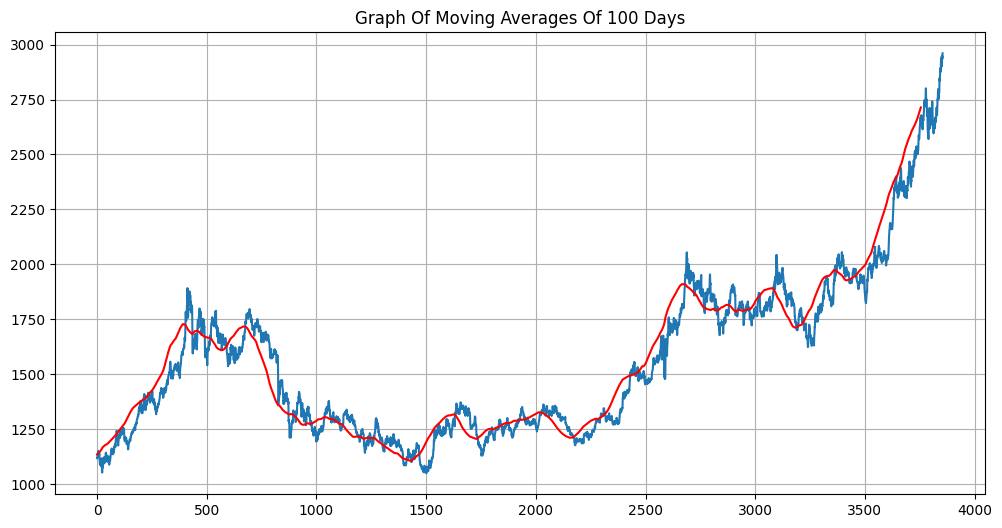

In [81]:
plt.figure(figsize = (12,6))
plt.plot(df.Price)
plt.plot(ma100, 'r')
plt.grid(True)
plt.title('Graph Of Moving Averages Of 100 Days')

# Defining 200 days moving averages and plotting comparision graph with 100 days moving averages

---



In [82]:
ma200 = df.Price.rolling(200).mean()
ma200

3854          NaN
3853          NaN
3852          NaN
3851          NaN
3850          NaN
          ...    
4       1194.3630
3       1193.4060
2       1192.4605
1       1191.3330
0       1190.2445
Name: Price, Length: 3855, dtype: float64

Text(0.5, 1.0, 'Comparision Of 100 Days And 200 Days Moving Averages')

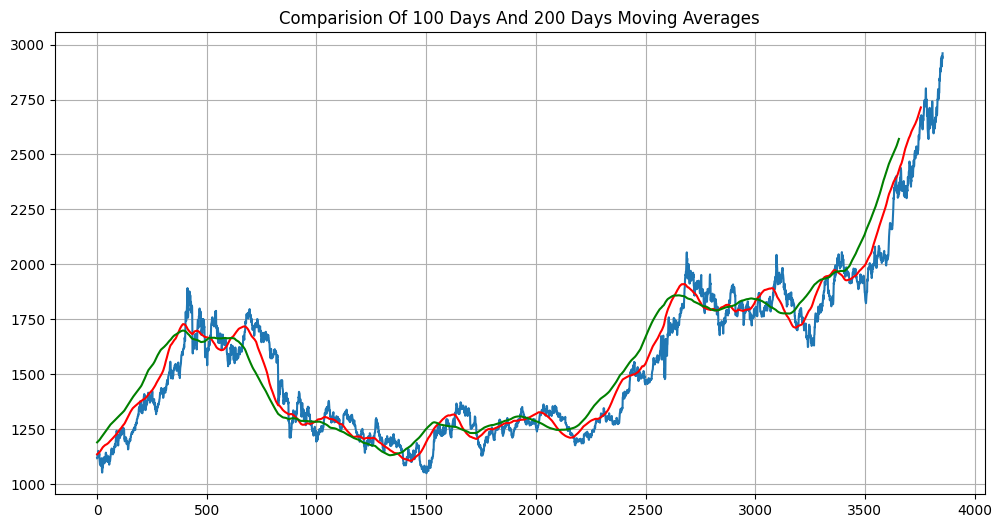

In [83]:
plt.figure(figsize = (12,6))
plt.plot(df.Price)
plt.plot(ma100, 'r')
plt.plot(ma200, 'g')
plt.grid(True)
plt.title('Comparision Of 100 Days And 200 Days Moving Averages')

In [84]:
df.shape

(3855, 7)

# Spliting the dataset into training (70%) and testing (30%) set

In [91]:
# Splitting data into training and testing

train = pd.DataFrame(df[0:int(len(df)*0.70)])
test = pd.DataFrame(df[int(len(df)*0.70): int(len(df))])

print(train.shape)
print(test.shape)

(2698, 7)
(1157, 7)


In [92]:
train.head()

,Date,Price,Open,High,Low,Vol.,Change %
3854,2025-02-20,2960.3,2951.49,2961.95,2951.3,22.17K,0.82%
3853,2025-02-19,2936.1,2954.10,2964.40,2933.7,159.34K,-0.44%
3852,2025-02-18,2949.0,2895.10,2956.50,2887.6,218.76K,1.67%
3851,2025-02-14,2900.7,2957.30,2964.10,2889.9,228.08K,-1.52%
3850,2025-02-13,2945.4,2928.80,2958.80,2925.8,169.50K,0.57%


In [93]:
test.head()

,Date,Price,Open,High,Low,Vol.,Change %
1156,2014-08-06,1308.2,1288.9,1311.0,1288.5,160.37K,1.78%
1155,2014-08-05,1285.3,1289.2,1295.0,1283.3,105.68K,-0.28%
1154,2014-08-04,1288.9,1295.4,1296.4,1287.0,67.87K,-0.46%
1153,2014-08-01,1294.8,1284.2,1298.4,1281.0,144.99K,0.94%
1152,2014-07-31,1282.8,1297.0,1298.8,1281.3,143.36K,-1.09%


# Using Standard and Robust scaler in chaining for normalization of the dataset

---



In [94]:
from sklearn.preprocessing import StandardScaler , RobustScaler

In [95]:
train_close = train.iloc[:, 4:5].values # 
test_close = test.iloc[:, 4:5].values
print(train_close[0])
print(test_close[0]) #these really show that we are selecting the correct column

[2951.3]
[1288.5]


In [96]:
robust_scaler = RobustScaler()
gold_prices_robust = robust_scaler.fit_transform(train_close)

# Apply StandardScaler (Standardize the Robust-Scaled Data)
standard_scaler = StandardScaler()
data_training_array = standard_scaler.fit_transform(gold_prices_robust)

In [18]:
x_train = []
y_train = [] 

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100: i])
    y_train.append(data_training_array[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train) 

In [19]:
x_train.shape

(2561, 100, 1)

# ML Model (LSTM)

---



In [27]:
from tensorflow.keras.layers import Dense, Dropout, LSTM,GRU
from tensorflow.keras.models import Sequential

In [ ]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences=True
              ,input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))


model.add(LSTM(units = 60, activation = 'relu', return_sequences=True))
model.add(Dropout(0.3))


model.add(LSTM(units = 80, activation = 'relu', return_sequences=True))
model.add(Dropout(0.4))


model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1))

c:\Users\lostinhaze\anaconda3\envs\eda\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
gru_model = Sequential()

gru_model.add(GRU(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
gru_model.add(Dropout(0.2))

gru_model.add(GRU(60, return_sequences=True))
gru_model.add(Dropout(0.3))

gru_model.add(GRU(80, return_sequences=True))
gru_model.add(Dropout(0.4))

gru_model.add(GRU(120))
gru_model.add(Dropout(0.5))

gru_model.add(Dense(units=1))

gru_model.compile(optimizer='adam', loss='mean_squared_error', metrics=[tf.keras.metrics.MeanAbsoluteError()])



In [23]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 100, 60)        │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 100, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 100, 80)        │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 100, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

In [24]:
gru_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

# Training the model

---



In [25]:
import tensorflow as tf
model.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics=[tf.keras.metrics.MeanAbsoluteError()])
model.fit(x_train, y_train,epochs = 100)

Epoch 1/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 52s 318ms/step - loss: 37685704.0000 - mean_absolute_error: 435.3491
Epoch 2/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 22s 268ms/step - loss: 0.5902 - mean_absolute_error: 0.5198
Epoch 3/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 21s 260ms/step - loss: 0.5869 - mean_absolute_error: 0.5152
Epoch 4/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 21s 267ms/step - loss: 0.6929 - mean_absolute_error: 0.5066
Epoch 5/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 24s 300ms/step - loss: 0.5629 - mean_absolute_error: 0.4660
Epoch 6/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 21s 256ms/step - loss: 0.5348 - mean_absolute_error: 0.4889
Epoch 7/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 23s 285ms/step - loss: 0.5073 - mean_absolute_error: 0.4732
Epoch 8/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 25s 309ms/step - loss: 0.4979 - mean_absolute_error: 0.4603
Epoch 9/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 39s 288ms/step - loss: 0.4402 - mean_absolute_error: 0.4346
Epoch 10/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 39s 256ms/step - loss: 0.4622 - mean_absolute_error: 0.4527


In [26]:
gru_model.fit(x_train, y_train,epochs = 100)

Epoch 1/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 42s 298ms/step - loss: 0.2480 - mean_absolute_error: 0.3283
Epoch 2/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 26s 321ms/step - loss: 0.0453 - mean_absolute_error: 0.1535
Epoch 3/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 24s 298ms/step - loss: 0.0366 - mean_absolute_error: 0.1393
Epoch 4/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 23s 288ms/step - loss: 0.0370 - mean_absolute_error: 0.1411
Epoch 5/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 22s 275ms/step - loss: 0.0378 - mean_absolute_error: 0.1392
Epoch 6/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 24s 295ms/step - loss: 0.0347 - mean_absolute_error: 0.1340
Epoch 7/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 24s 295ms/step - loss: 0.0331 - mean_absolute_error: 0.1325
Epoch 8/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 22s 273ms/step - loss: 0.0336 - mean_absolute_error: 0.1320
Epoch 9/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 26s 325ms/step - loss: 0.0297 - mean_absolute_error: 0.1254
Epoch 10/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 30s 369ms/step - loss: 0.0313 - mean_absolute_error: 0.1267
Epoch 11/

In [27]:
model.save('lstm_model.keras')

In [28]:
gru_model.save('gru_model.keras')

In [80]:
test_close.shape

(1139, 1)

In [81]:
past_100_days = pd.DataFrame(train_close[-100:])

In [82]:
test_df = pd.DataFrame(test_close)

**Defining the final dataset for testing by including last 100 coloums of the training dataset to get the prediction from the 1st column of the testing dataset.**

---


In [83]:
final_df = pd.concat([past_100_days, test_df], ignore_index=True)

In [84]:
final_df.head()
final_df.tail()

,0
1234,2770.000000
1235,2804.000000
1236,2780.899902
1237,2816.100098
1238,2848.000000


In [85]:
input_data = standard_scaler.fit_transform(robust_scaler.fit_transform(final_df))
input_data

array([[-1.11303647],
       [-1.07562963],
       [-1.12799903],
       ...,
       [ 2.92583334],
       [ 3.05123601],
       [ 3.16488121]])

In [86]:
input_data.shape

(1239, 1)

# Testing the model

---



In [87]:
x_test = []
y_test = []
for i in range(100, input_data.shape[0]):
   x_test.append(input_data[i-100: i])
   y_test.append(input_data[i, 0])

In [88]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(1139, 100, 1)
(1139,)


# Making prediction and plotting the graph of predicted vs actual values

---



In [89]:
# Making predictions

y_pred = model.predict(x_test)

36/36 ━━━━━━━━━━━━━━━━━━━━ 6s 167ms/step


In [90]:
y_pred.shape

(1139, 1)

In [91]:
y_test

array([-0.02503171, -0.1055454 , -0.04141938, ...,  2.92583334,
        3.05123601,  3.16488121])

In [92]:
y_pred

array([[-0.36903626],
       [-0.3315134 ],
       [-0.29293436],
       ...,
       [ 2.0070891 ],
       [ 2.0205796 ],
       [ 2.0359387 ]], dtype=float32)

In [93]:
#standard_scaler.scale_


In [95]:
# scale_factor = 1/0.00041967
# y_pred = y_pred * scale_factor
# y_test = y_test * scale_factor
y_test2 = robust_scaler.inverse_transform(standard_scaler.inverse_transform(y_test.reshape(-1, 1)))
y_pred = robust_scaler.inverse_transform(standard_scaler.inverse_transform(y_pred))

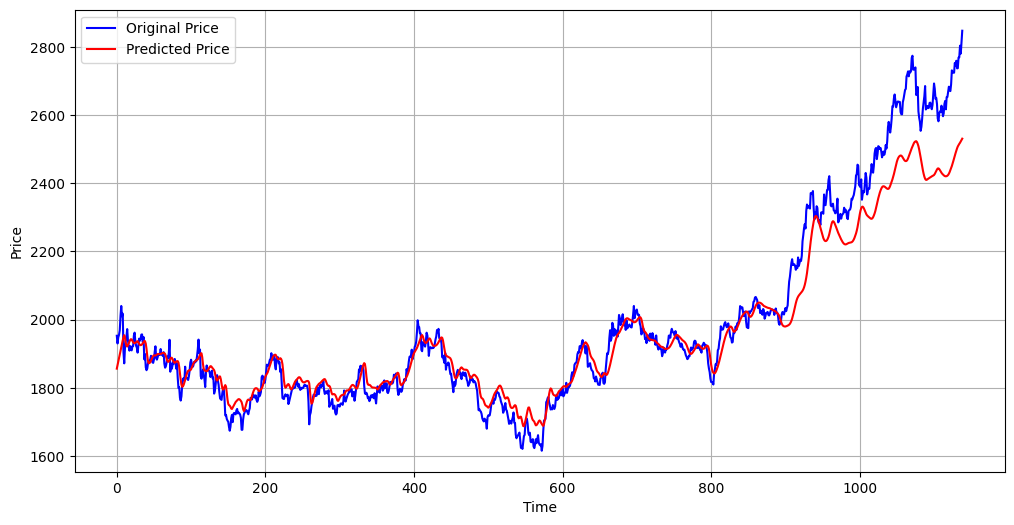

In [96]:
plt.figure(figsize = (12,6))
plt.plot(y_test2, 'b', label = "Original Price")
plt.plot(y_pred, 'r', label = "Predicted Price")
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

# Model evaluation

Calculation of mean absolute error

In [97]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_pred)
mae_percentage = (mae / np.mean(y_test)) * 100
print("Mean absolute error on test set: {:.2f}%".format(mae_percentage))


Mean absolute error on test set: 2424446.44%


Calculation of R2 score

In [98]:
from sklearn.metrics import r2_score 

# Actual values
actual = y_test

# Predicted values
predicted = y_pred

# Calculate the R2 score
r2 = r2_score(actual, predicted)
print("R2 score:", r2)

R2 score: -3899850.219679841


In [ ]:
# Plotting the R2 score
fig, ax = plt.subplots()
ax.barh(0, r2, color='skyblue')
ax.set_xlim([-1, 1])
ax.set_yticks([])
ax.set_xlabel('R2 Score')
ax.set_title('R2 Score')

# Adding the R2 score value on the bar
ax.text(r2, 0, f'{r2:.2f}', va='center', color='black')

plt.show()

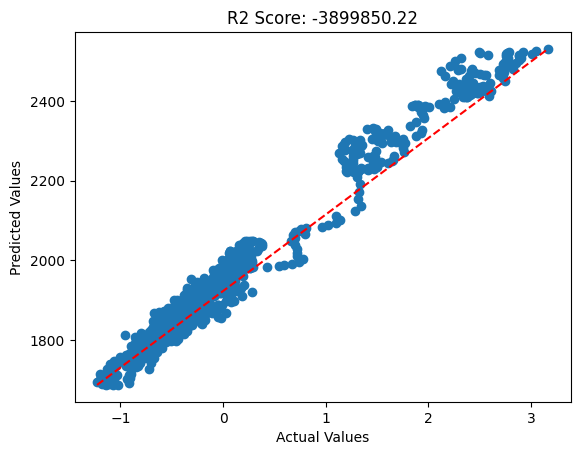

In [100]:
plt.scatter(actual, predicted)
plt.plot([min(actual), max(actual)], [min(predicted), max(predicted)], 'r--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title(f'R2 Score: {r2:.2f}')
plt.show()

In [101]:
from tensorflow.keras.models import load_model

model = load_model('lstm_model.keras')

In [102]:
last_sequence = input_data[-100:].reshape(1, 100, input_data.shape[1])

next_value = model.predict(last_sequence)
print("Next Predicted Value:", next_value)

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
Next Predicted Value: [[2.054438]]


In [103]:
import numpy as np

future_steps = 10  # Number of steps to predict
predicted_values = []

# Start with the last sequence
current_sequence = input_data[-100:].reshape(1, 100, input_data.shape[1])  # Shape: (1, 100, n_features)

for _ in range(future_steps):
    # Predict the next value
    next_value = model.predict(current_sequence)  # Shape: (1, n_features)
    
    # Append predicted value to the list
    predicted_values.append(next_value[0])  # Flatten the predicted value
    
    # Reshape next_value to match the sequence format
    next_value_reshaped = next_value.reshape((1, 1, input_data.shape[1]))  # Shape: (1, 1, n_features)
    
    # Update current_sequence: Remove the oldest value and append the new one
    current_sequence = np.concatenate((current_sequence[:, 1:, :], next_value_reshaped), axis=1)

print("Predicted Future Values:", np.array(predicted_values))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 331ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 324ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 320ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 354ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 314ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 330ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 302ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 378ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 300ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 258ms/step
Predicted Future Values: [[2.054438 ]
 [2.0452514]
 [2.0047653]
 [1.9435208]
 [1.8755575]
 [1.8040429]
 [1.7293923]
 [1.6536978]
 [1.5777699]
 [1.5033469]]
